**Homework 4**

(1): 
In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use random.seed(1), prior to starting part (a) to ensure consistent results. (**3 pts**)

In [162]:
%matplotlib inline
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

(a) Using the random.normal() function, create a vector, $x$, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, $X$.

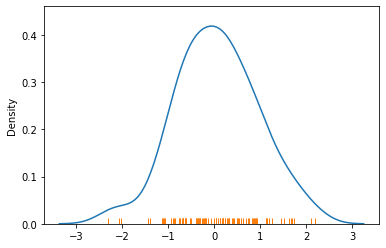

In [163]:
x = np.random.normal(size=100)
sns.kdeplot(x);
sns.rugplot(x); #to show individual observations

(b) Using the random.normal() function, create a vector, $eps$, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

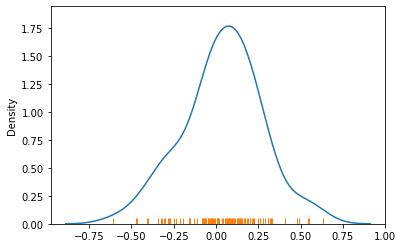

In [164]:
eps = np.random.normal(scale = 0.5, size=100)

sns.kdeplot(eps);
sns.rugplot(eps);

(c) Using $x$ and $eps$, generate a vector $y$ according to the model

$Y = −1 + 0.5X + \epsilon$ 

What is the length of the vector $y$? What are the values of $\beta_0$
and $\beta_1$ in this linear model?

In [165]:
y = -1 + .5*x + eps
print('Length of y = ' + str(len(y)))

Length of y = 100


(d) Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

In [166]:
df = pd.DataFrame({'x': x, 'y': y})

In [167]:
df

,x,y
0,1.624345,-0.299609
1,-0.611756,-0.999751
2,-0.528172,-1.163213
3,-1.072969,-1.388090
4,0.865408,-0.841024
...,...,...
95,0.077340,-1.368190
96,-0.343854,-1.021347
97,0.043597,-0.873131
98,-0.620001,-1.107263


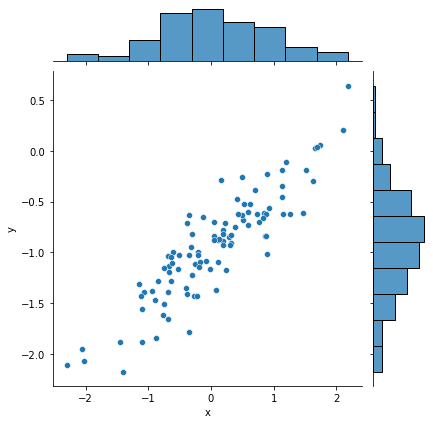

In [168]:
sns.jointplot(x='x', y='y', data=df);

It seems linear with no indication on outliers. 

Outlier is an observation of data that does not fit the rest of the data. An outlier is a point for which $y_i$ is far from the expected range predicted by the fit of the model. This raises the question of whether it is representative of the population.

(e) Fit a least squares linear model to predict $y$ using $x$. Comment on the model obtained. How do $\hat{\beta_0}$ and
$\hat{\beta_1}$ compare to $\beta_0$ and
$\beta_1$?

In [169]:
reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           5.39e-36
Time:                        09:25:10   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
reg.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,-1.009870,-0.916623
x,0.471307,0.576407


The coefficients of the regression are similar to the "true" values, although they are not equal (naturally). Here, $\hat{\beta_0}$ and $\hat{\beta_1}$ are -0.9632 and 0.5239 respectively.

**Another Method**

In [171]:
import statsmodels.api as sm # To use statsmodel

In [172]:
# Define data
X = pd.DataFrame({'x': x})
X = sm.add_constant(X) 

# Create model
model = sm.OLS(y,X)

# Fit regression model
results = model.fit()

# Print results
results.summary()

c:\users\charitha\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           5.39e-36
Time:                        09:25:10   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Most regression models include a constant term (i.e., an "intercept"), since this ensures that the model will be unbiased, in other words, the mean of the residuals will be zero. The reason for this is that it takes care of the bias in the data (a constant difference which is there for all observations)

(f) Repeat (a)–(e) after modifying the data generation process in such a way that there is less noise in the data. The model should remain the same. You can do this by decreasing the variance
of the normal distribution used to generate the error term in (b). Describe your results.

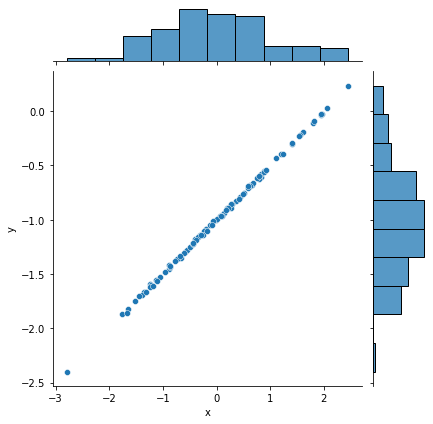

In [174]:
x = np.random.normal(size=100)
eps = np.random.normal(scale = 0.01, size=100)
y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

In [175]:
reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.185e+05
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          6.80e-166
Time:                        09:25:10   Log-Likelihood:                 312.52
No. Observations:                 100   AIC:                            -621.0
Df Residuals:                      98   BIC:                            -615.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0002      0.001   -931.475      0.000      -1.002      -0.998
x              0.4994      0.001    467.445      0.000       0.497       0.502
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, we have a better fit, a better confidence intervals, and a higher R-squared.

Our model fits this data set better than the previous one that was generated from a noisier distribution.

(g) Repeat (a)–(e) after modifying the data generation process in such a way that there is more noise in the data. The model
should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term in (b). Describe your results

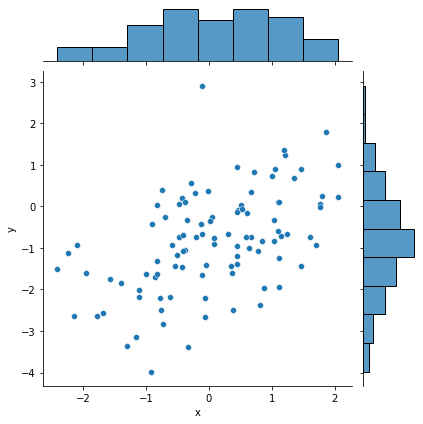

In [176]:
x = np.random.normal(size=100)
eps = np.random.normal(scale = 1, size=100)
y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x='x', y='y', data=df)

In [177]:
reg = smf.ols('y ~ x', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     33.96
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           7.19e-08
Time:                        09:25:11   Log-Likelihood:                -145.66
No. Observations:                 100   AIC:                             295.3
Df Residuals:                      98   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8802      0.105     -8.375      0.000      -1.089      -0.672
x              0.5903      0.101      5.828      0.000       0.389       0.791
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.566
Skew:                           0.192   Prob(JB):                        0.168
Kurtosis:                       3.842   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we have a much worse fit. The R-squared of just 0.257 and wider confidence intervals.

In [178]:
reg.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,-1.088787,-0.671654
x,0.389282,0.791316


**Confidence Intervals**

Confidence, in statistics, is another way to describe probability. For example, if you construct a confidence interval with a 95% confidence level, you are confident that 95 out of 100 times the estimate will fall between the upper and lower values specified by the confidence interval.

We most likely use a two-tailed interval unless we do a one-tailed t-test. For a two-tailed interval, divide your alpha by two to get the alpha value for the upper and lower tails.

**Differences among these evaluation metrics**

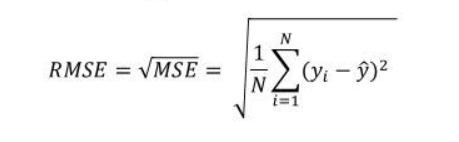

Mean Squared Error represents the root of the average of squared difference between the original and predicted values in the data set. It measures the standard deviation of residuals.

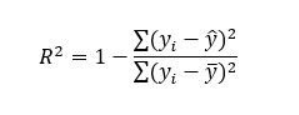

The coefficient of determination or $R^2$ represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of $R^2$ will be less than one.

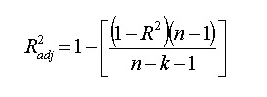

Adjusted $R^2$ is a modified version of $R^2$, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to $R^2$.In the formula below $n$ is the number of observations in the data and $k$ is the number of the independent variables in the data.

* $R^2$ & Adjusted $R^2$ are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. $R^2$ value always increases with the addition of the independent variables which might lead to the addition of the redundant variables in our model. However, the adjusted $R^2$ solves this problem.

* The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while $R^2$ tells how well the predictor variables can explain the variation in the response variable.



* $R^2$’s drawback:
It does have one big drawback, though. In multiple regression as you add predictors, it will get bigger. Because of the way it’s calculated, it can never go down with more predictors. That raises a few issues.

First $R^2$ will go up even if those predictors don’t help predict $Y$. Sure, it won’t go up a lot, but it will gradually get bigger with more predictors. And model complexity isn’t a good thing. If we’re going to add more predictors, we want to make sure they’re helpful.


* Adjusted $R^2$ does just what is says: it adjusts the $R^2$ value. This adjustment is a penalty that is subtracted from R². The size of the penalty is based on the number of predictors and the sample size.

If you add a predictor that is useful in predicting $Y$, the adjusted $R^2$ will increase because the penalty will be smaller than the $R^2$ increase. But if you add a predictor that is not useful in predicting $Y$, the adjusted $R^2$ will decrease because the penalty will be a bigger negative than the small increase.
In fact, while $R^2$ cannot be below 0, adjusted $R^2$ can. So it’s a super-useful way to tell if adding predictors to a model is adding useless complexity.

(2): In this exercise, you will implement KNN algorithm and compute Root Mean Square Error (RMSE) for different $k$ values in (a) and (b). The first steps are already completed. (**2 pts**)

In [188]:
import pandas as pd
df = pd.read_csv('train.csv')

Impute missing values

In [189]:
df.isnull().sum()
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() 
df['Outlet_Size'].fillna(mode[0], inplace =True)

Change Categorical variables to dummy variables

In [190]:
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)

Split train and test data

In [191]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

Scale the features

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [193]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

(a) Implement KNN regression and compute the RMSE for a range of values of $k$ from 1 to 25. You may first fit the regression model into x_train, y_train, and then make predictions on the test set using x_test inorder to calculate the RMSE between actual y_test and predictions.  

In [194]:
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1631.9332623127184
RMSE value for k=  2 is: 1396.548706307395
RMSE value for k=  3 is: 1308.8989589026753
RMSE value for k=  4 is: 1271.9798771171284
RMSE value for k=  5 is: 1249.9931257220321
RMSE value for k=  6 is: 1227.0647690893957
RMSE value for k=  7 is: 1218.145552464537
RMSE value for k=  8 is: 1207.3195698428153
RMSE value for k=  9 is: 1208.529519010589
RMSE value for k=  10 is: 1206.756800572614
RMSE value for k=  11 is: 1205.3556829788483
RMSE value for k=  12 is: 1202.1399224505362
RMSE value for k=  13 is: 1205.461243062814
RMSE value for k=  14 is: 1213.6976738180501
RMSE value for k=  15 is: 1218.3949593358072
RMSE value for k=  16 is: 1222.3750541740642
RMSE value for k=  17 is: 1226.5394171291744
RMSE value for k=  18 is: 1235.3895657286107
RMSE value for k=  19 is: 1238.617192288228
RMSE value for k=  20 is: 1246.8860547852435
RMSE value for k=  21 is: 1250.0112755957412
RMSE value for k=  22 is: 1251.6588150539244
RMSE value for k=  23 is:

(b) Plot the RMSE values against $k$ values.

<AxesSubplot:>

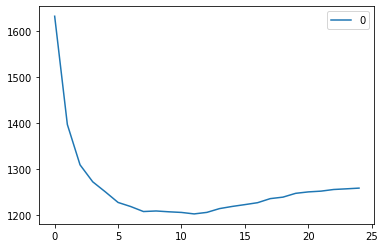

In [195]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

We can select the $k$ value which gives the lowest root mean square error from the elbow plot.